### Objective: In this project our goal is to predict the probability of a bank customer is likely to churn, using ANN techniques.

In [1]:
# Import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

#### dataset link: https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers?select=Churn_Modelling.csv

In [2]:
# Import dataset
dataset = pd.read_csv('N:\Projects\Machine Learning Project\Predicting Churn for bank customers\Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:>

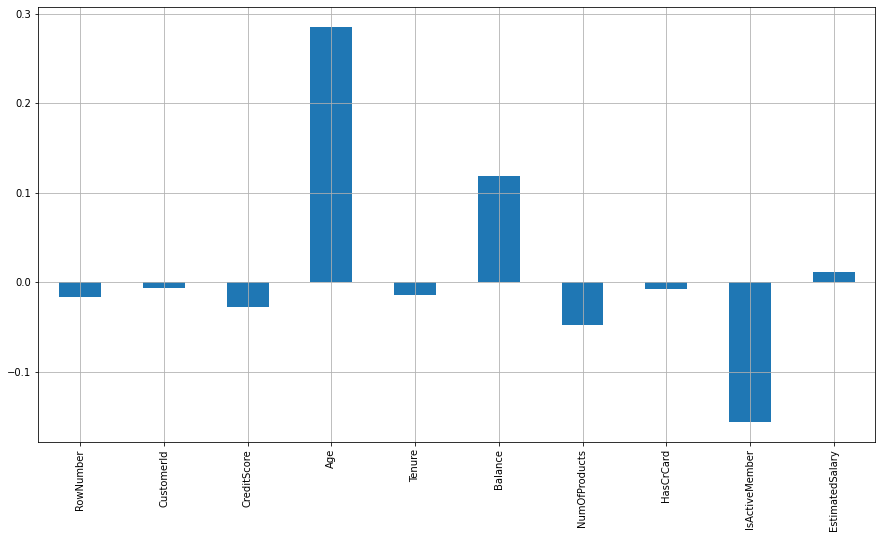

In [4]:
# selection of independent and dependent variables. it shows all numerical columns.
dataset.drop(columns='Exited').corrwith(dataset['Exited']).plot.bar(figsize=(15,8),grid=True)

In [5]:
X = dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = dataset['Exited']

In [6]:
# encoding the categorical data
X = pd.get_dummies(X, drop_first=True)

In [7]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [8]:
# Splitting the dataset into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building the Model

In [10]:
# Creating an object (Initializing the ANN)
model = tf.keras.models.Sequential()

In [11]:
# Adding first input layer and first hidden layer.
# units = 6
# activation function = ReLU
# input dim = 11
model.add(tf.keras.layers.Dense(units=6, activation='relu', input_dim=11))

In [12]:
# Adding second hidden layer
model.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [13]:
# Output Layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [14]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


# Training the model


In [16]:
model.fit(X_train, y_train.to_numpy(), batch_size=10, epochs=20)

Epoch 1/20
800/800 [==============================] - 1s 983us/step - loss: 0.6171 - accuracy: 0.6661
Epoch 2/20
800/800 [==============================] - 1s 965us/step - loss: 0.4373 - accuracy: 0.8027
Epoch 3/20
800/800 [==============================] - 1s 973us/step - loss: 0.4142 - accuracy: 0.8192
Epoch 4/20
800/800 [==============================] - 1s 981us/step - loss: 0.3974 - accuracy: 0.8328
Epoch 5/20
800/800 [==============================] - 1s 970us/step - loss: 0.3772 - accuracy: 0.8447
Epoch 6/20
800/800 [==============================] - 1s 1ms/step - loss: 0.3623 - accuracy: 0.8526
Epoch 7/20
800/800 [==============================] - 1s 1ms/step - loss: 0.3554 - accuracy: 0.8551
Epoch 8/20
800/800 [==============================] - 1s 1ms/step - loss: 0.3519 - accuracy: 0.8583
Epoch 9/20
800/800 [==============================] - 1s 969us/step - loss: 0.3507 - accuracy: 0.8587
Epoch 10/20
800/800 [==============================] - 1s 963us/step - loss: 0.3499 - ac

# Model Evaluation and Prediction

In [17]:
# Evaluate the model
test_acc, test_acc = model.evaluate(X_test, y_test.to_numpy())

63/63 [==============================] - 0s 835us/step - loss: 0.3398 - accuracy: 0.8555


In [18]:
print(f"test accuracy is: {test_acc}")

test accuracy is: 0.8554999828338623


In [19]:
y_pred = np.argmax(model.predict(X_test), axis=1)

In [20]:
y_test = y_test.to_numpy()

In [21]:
y_test[0], y_pred[0]

(0, 0)

In [22]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[1595,    0],
       [ 405,    0]], dtype=int64)

In [23]:
# Accuracy Score
accuracy_score(y_pred, y_test)

0.7975